# TP : Loi de Malus et polarisation d'une onde électromagnétique

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib widget

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

## Résultats des mesures de tension du luxmètre
### Paillasse N°1

In [2]:
theta = np.array([0, 10, 20, 30, 40, 50, 60, 70, 75, 80, 85, 90])
u_theta = np.array(len(theta)*[2])
### Paillasse N°1
U1_1 = np.array([3.501, 3.426, 3.201, 2.861, 2.347, 1.700, 0.981, 0.464, 0.256, 0.134, 0.049, 0.039])
U2_1 = np.array([3.501, 3.450, 3.274, 2.976, 2.442, 1.942, 1.234, 0.694, 0.380, 0.266, 0.118, 0.045])
###
U1_2 = np.array([3.480, 3.390, 3.170, 2.810, 2.280, 1.618, 0.940, 0.424, 0.232, 0.103, 0.035, 0.031])
U2_2 = np.array([3.480, 3.419, 3.224, 2.904, 2.448, 1.872, 1.212, 0.628, 0.373, 0.214, 0.099, 0.031])
###
U1_3 = np.array([3.472, 3.407, 3.174, 2.887, 2.347, 1.750, 0.980, 0.444, 0.246, 0.106, 0.039, 0.034])
U2_3 = np.array([3.472, 3.515, 3.316, 2.998, 2.526, 1.988, 1.261, 0.678, 0.445, 0.240, 0.100, 0.039])

### moyenne et incertitude-type des groupes de mesure de la paillasse N°1
U1 = np.array([np.mean([U1_1[i],U1_2[i],U1_3[i]]) for i in range(len(U1_1))])
U2 = np.array([np.mean([U2_1[i],U2_2[i],U2_3[i]]) for i in range(len(U2_1))])
u_U1 = np.array([np.std([U1_1[i],U1_2[i],U1_3[i]],ddof=1) for i in range(len(U1_1))])
u_U2 = np.array([np.std([U2_1[i],U2_2[i],U2_3[i]],ddof=1) for i in range(len(U2_1))])

### Paillasse N°2

In [3]:
### Paillasse N°2
V1_1 = np.array([3.118, 3.015, 2.746, 2.556, 2.190, 1.706, 1.131, 0.667, 0.488, 0.298, 0.180, 0.098])
V2_1 = np.array([3.118, 3.000, 2.600, 2.200, 1.600, 1.050, 0.800, 0.200, 0.090, 0.024, 0.016, 0.045])
###
V1_2 = np.array([3.105, 2.899, 2.946, 2.728, 2.383, 1.819, 1.289, 0.759, 0.515, 0.312, 0.175, 0.070])
V2_2 = np.array([3.105, 2.985, 2.641, 2.215, 1.696, 1.130, 0.614, 0.211, 0.095, 0.029, 0.013, 0.052])

### moyenne et incertitude-type des groupes de mesure de la paillasse N°2
V1 = np.array([np.mean([V1_1[i],V1_2[i]]) for i in range(len(V1_1))])
V2 = np.array([np.mean([V2_1[i],V2_2[i]]) for i in range(len(V2_1))])
u_V1 = np.array([np.std([V1_1[i],V1_2[i]],ddof=1) for i in range(len(V1_1))])
u_V2 = np.array([np.std([V2_1[i],V2_2[i]],ddof=1) for i in range(len(V2_1))])

## Tracé des données brutes sans correction du zéro du polariseur
### Données communes

In [4]:
N = 10000 # Paramètre de MonteCarlo

x = [] # variable dans laquelle sera stocké cos^2(theta)
u_x = [] # variable dans laquelle sera stocké l'incertitude-type sur cos^2(theta)

### Paillasse N°1

In [5]:
for i in range(len(theta)):
    x_store = []
    for j in range(N):
        x_store.append(np.cos(np.pi/180*(theta[i]+np.random.uniform(-1,1)*u_theta[i]))**2)
    x.append(np.mean(x_store))
    u_x.append(np.std(x_store, ddof=1))
    
U = [] # variable dans laquelle sera stocké la moyenne de U1, U2
u_U = [] #variable dans laquelle sera stocké l'incertitude-type sur la moyenne de U1, U2

for i in range(len(U1)):
    U_store = []
    for j in range(N):
        U_store.append(np.mean([U1[i]+np.random.uniform(-1,1)*u_U1[i],U2[i]]+np.random.uniform(-1,1)*u_U2[i]))
    U.append(np.mean(U_store))
    u_U.append(np.std(U_store, ddof=1))

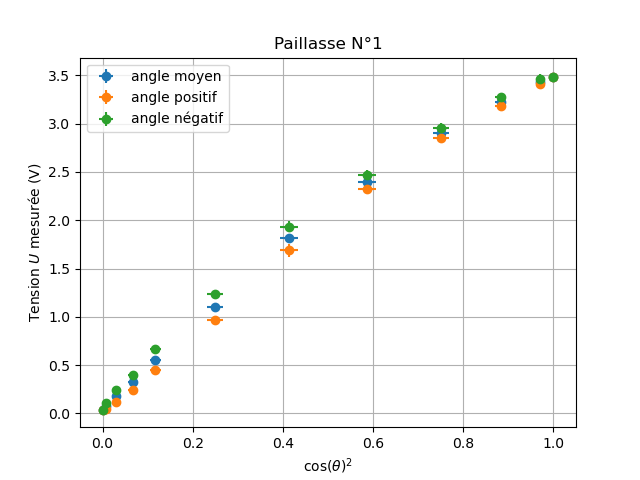

In [6]:
plt.figure()
plt.title('Paillasse N°1')
plt.errorbar(x, U, xerr=u_x, yerr = u_U, fmt='o', label='angle moyen')
plt.errorbar(x, U1, xerr=u_x, yerr = u_U1, fmt='o',label='angle positif')
plt.errorbar(x, U2, xerr=u_x, yerr = u_U2, fmt='o',label='angle négatif')
plt.legend()
plt.ylabel(r'Tension $U$ mesurée (V)')
plt.xlabel(r'$\cos(\theta)^2$')
plt.grid(True)
plt.show()

### Paillasse N°2

In [7]:
V = [] # variable dans laquelle sera stocké la moyenne de V1, V2
u_V = [] #variable dans laquelle sera stocké l'incertitude-type sur la moyenne de V1, V2

for i in range(len(U1)):
    V_store = []
    for j in range(N):
        V_store.append(np.mean([V1[i]+np.random.uniform(-1,1)*u_V1[i],V2[i]]+np.random.uniform(-1,1)*u_V2[i]))
    V.append(np.mean(V_store))
    u_V.append(np.std(V_store, ddof=1))

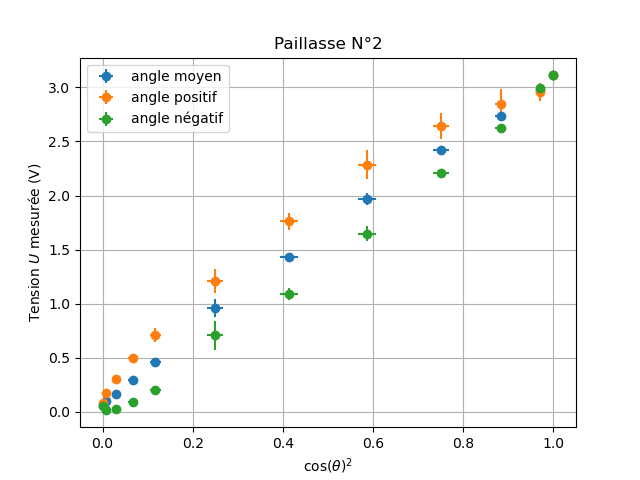

In [8]:
plt.figure()
plt.title('Paillasse N°2')
plt.errorbar(x, V, xerr=u_x, yerr = u_V, fmt='o', label='angle moyen')
plt.errorbar(x, V1, xerr=u_x, yerr = u_V1, fmt='o',label='angle positif')
plt.errorbar(x, V2, xerr=u_x, yerr = u_V2, fmt='o',label='angle négatif')
plt.legend()
plt.ylabel(r'Tension $U$ mesurée (V)')
plt.xlabel(r'$\cos(\theta)^2$')
plt.grid(True)
plt.show()

## Prise en compte d'une correction angulaire du zéro du polariseur
### Paillasse N°1

In [9]:
theta_corr_U = -7 # correction angulaire à apporter pour la paillasse N°1

x_U = [] # variable dans laquelle sera stocké cos^2(theta)
u_x_U = [] # variable dans laquelle sera stocké l'incertitude-type sur cos^2(theta)

for i in range(len(theta)):
    x_store = []
    for j in range(N):
        x_store.append(np.cos(np.pi/180*(theta_corr_U+theta[i]+np.random.uniform(-1,1)*u_theta[i]))**2)
    x_U.append(np.mean(x_store))
    u_x_U.append(np.std(x_store, ddof=1))
    
U = [] # variable dans laquelle sera stocké la moyenne de U1, U2
u_U = [] #variable dans laquelle sera stocké l'incertitude-type sur la moyenne de U1, U2

for i in range(len(U1)):
    U_store = []
    for j in range(N):
        U_store.append(np.mean([U1[i]+np.random.uniform(-1,1)*u_U1[i],U2[i]]+np.random.uniform(-1,1)*u_U2[i]))
    U.append(np.mean(U_store))
    u_U.append(np.std(U_store, ddof=1))

## Calcul de la droite de régression linéaire
z_U = np.polyfit(np.array(x_U), U, 1)

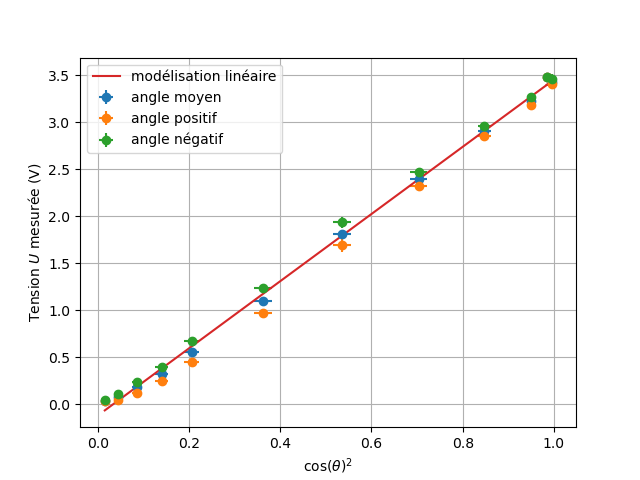

In [10]:
plt.figure()
plt.errorbar(x_U, U, xerr=u_x_U, yerr=u_U, fmt='o', label='angle moyen')
plt.errorbar(x_U, U1, xerr=u_x_U, yerr=u_U1, fmt='o',label='angle positif')
plt.errorbar(x_U, U2, xerr=u_x_U, yerr=u_U2, fmt='o',label='angle négatif')
plt.plot(x_U,z_U[1]+np.array(x_U)*z_U[0], label='modélisation linéaire')
plt.ylabel(r'Tension $U$ mesurée (V)')
plt.xlabel(r'$\cos(\theta)^2$')
plt.legend()
plt.grid(True)
plt.show()

### Paillasse N°2

In [11]:
theta_corr_V = -4 # correction angulaire à apporter pour la paillasse N°2

x_V = [] # variable dans laquelle sera stocké cos^2(theta)
u_x_V = [] # variable dans laquelle sera stocké l'incertitude-type sur cos^2(theta)

for i in range(len(theta)):
    x_store = []
    for j in range(N):
        x_store.append(np.cos(np.pi/180*(theta_corr_V+theta[i]+np.random.uniform(-1,1)*u_theta[i]))**2)
    x_V.append(np.mean(x_store))
    u_x_V.append(np.std(x_store, ddof=1))
    
V = [] # variable dans laquelle sera stocké la moyenne de V1, V2
u_V = [] #variable dans laquelle sera stocké l'incertitude-type sur la moyenne de V1, V2

for i in range(len(V1)):
    V_store = []
    for j in range(N):
        V_store.append(np.mean([V1[i]+np.random.uniform(-1,1)*u_V1[i],V2[i]]+np.random.uniform(-1,1)*u_V2[i]))
    V.append(np.mean(V_store))
    u_V.append(np.std(V_store, ddof=1))


## Calcul de la droite de régression linéaire
z_V = np.polyfit(np.array(x_V), V, 1)

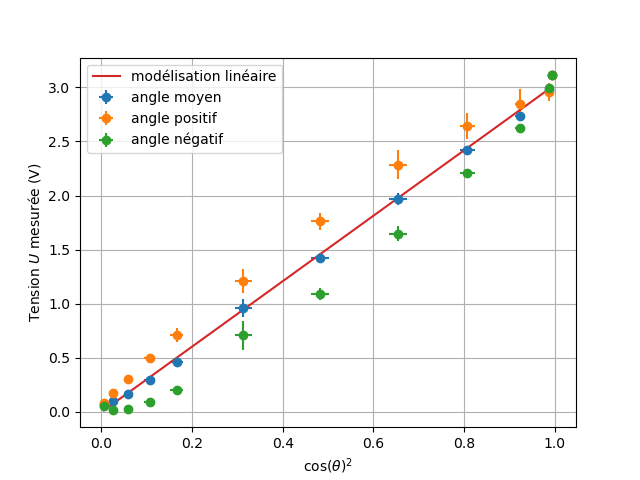

In [12]:
plt.figure()
plt.errorbar(x_V, V, xerr=u_x_V, yerr=u_V, fmt='o', label='angle moyen')
plt.errorbar(x_V, V1, xerr=u_x_V, yerr=u_V1, fmt='o',label='angle positif')
plt.errorbar(x_V, V2, xerr=u_x_V, yerr=u_V2, fmt='o',label='angle négatif')
plt.plot(x_V,z_V[1]+np.array(x_V)*z_V[0], label='modélisation linéaire')
plt.ylabel(r'Tension $U$ mesurée (V)')
plt.xlabel(r'$\cos(\theta)^2$')
plt.legend()
plt.grid(True)
plt.show()